In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset 

In [2]:
df = pd.read_csv('cleaned_property_data.csv')
df.head()

,address,suburb,state,post_code,price,property_type,bed,bath,parking
0,3/9 Lambert Street,CAMMERAY,NSW,2062,690.0,Apartment / Unit / Flat,2,1,0
1,18 Chatham Way,HARRISDALE,WA,6112,820.0,House,4,2,2
2,102/157-163 Burwood Road,HAWTHORN,VIC,3122,580.0,Apartment / Unit / Flat,2,1,1
3,77 Unnaro St,COOLOONGUP,WA,6168,570.0,House,3,2,3
4,7/77 Milson Road,CREMORNE POINT,NSW,2090,850.0,Apartment / Unit / Flat,2,1,0


## Explore the dataset

In [3]:
# Check dimension
df.shape

(991, 9)

In [4]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        991 non-null    object 
 1   suburb         991 non-null    object 
 2   state          991 non-null    object 
 3   post_code      991 non-null    int64  
 4   price          991 non-null    float64
 5   property_type  991 non-null    object 
 6   bed            991 non-null    int64  
 7   bath           991 non-null    int64  
 8   parking        991 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 69.8+ KB


## EDA

### Distribution of rent by State

**1. What does this visualisation reveal?**
- Price distribution
- Price trends
- Outliers
<br>

**2. Why this type of visualisation was selected?**

A scatter plot with a regression line is chosen because it effectively visualizes the relationship between the index and the price of properties across different states by presenting the trends, clustering by state, and outliers.
<br>

**3. How insights from the graph are useful for real estate stakeholders?**
- **Landlords** can see how their properties are priced relative to others in their state, helping with competitive pricing decisions.
- **Real estate agencies** can use the visualization to explore market trends to provide effective pricing strategies to tenants.
- **Tenants** can understand how prices vary across states and have a knowledge of which suburbs they should live in based on their budgets, also avoid overpriced listings by identifying outliers.

/Users/phuonganhpham/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


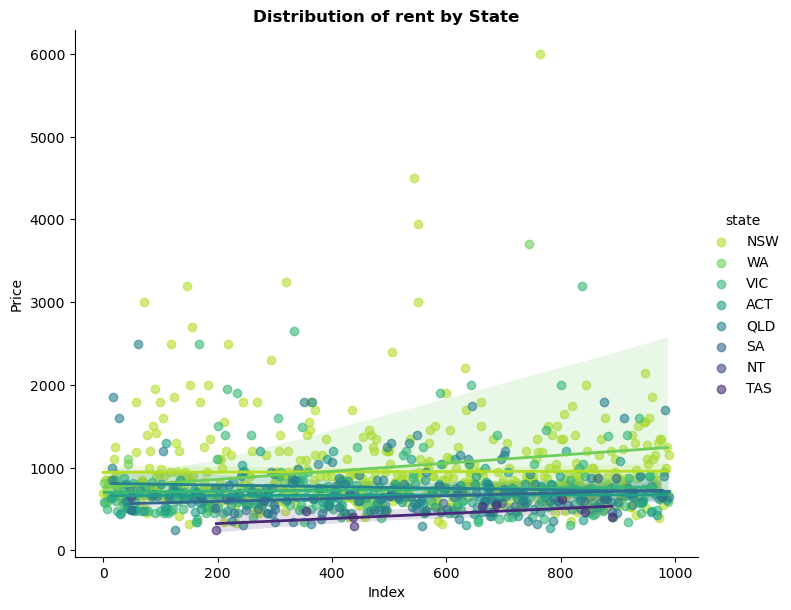

In [5]:
# Reset the index for proper plotting
data = df.reset_index()

# Scatter plot with regression line
sns.lmplot(
    x='index', 
    y='price', 
    hue='state', 
    data=data, 
    palette='viridis_r', 
    height=6, 
    aspect=1.2, 
    scatter_kws={'alpha': 0.6}, 
    line_kws={'linewidth': 2}) 

# Add title
plt.title('Distribution of rent by State', fontsize=12, weight='bold')

# Add labels
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

### Distribution of properties across States

**1. What does this visualisation reveal?**
- The number of properties listed across states of Australia.
- Any discrepancies between property counts in different states.

**2. Why this type of visualisation was selected?** Barplot is ideal when visualizing the distribution of property counts by states because:
- This type of chart can clearly show the number of properties in each state, making it easy to identify which states have more or fewer listings.
- Sorting the data from highest to lowest provides immediate insight into which state has the most listings in domain website.
- The number of listings are displayed on top of each bar which allows stakeholders to quickly see the exact count without needing to interpret the graph.

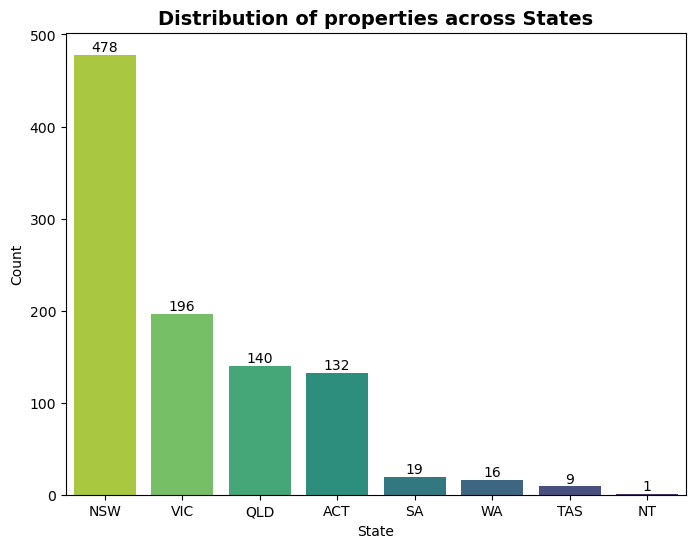

In [6]:
# Set figure size
plt.figure(figsize=(8,6))

# Count the number of properties by state
count = df['state'].value_counts().sort_values(ascending=False)

# Visualize
sns.barplot(x=count.index, y=count.values, palette='viridis_r')

# Add title
plt.title('Distribution of properties across States', fontsize=14, weight='bold')

# Add labels
plt.xlabel('State')
plt.ylabel('Count')

# Display values
y = count.values
for i, value in enumerate(y):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

### Distribution of rent by Property type

**1. What does this visualisation reveal?**
- Price range by property type
- Difference among the *Median rent* of property types
- Outliers
<br>

**2. Why this type of visualisation was selected?** Boxplot is a great choice because it can effectively visualizes the distribution of rent across different property types, providing information about *Median*, *IQR*, and *Outliers*
<br>

**3. How insights from the graph are useful for real estate stakeholders?**
- **Landlords** can better set rental prices for their properties using insights of price range and median price
- **Real estate agencies** can use insights from this visualization to explore the rental market.
- **Tenants** can use this information to understand which property types are more affordable, and make decisions whether to rent or not.

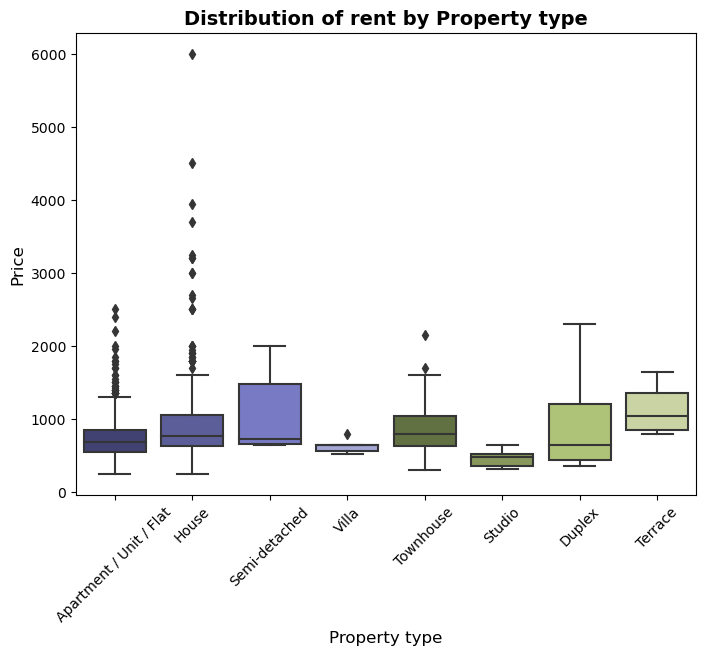

In [7]:
# Set figure size
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x='property_type', y='price', data=df, palette='tab20b')

# Add title
plt.title('Distribution of rent by Property type', fontsize=14, weight='bold')

# Add labels
plt.xlabel('Property type', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate xticks
plt.xticks(rotation=45)
plt.show()

### Distribution of rent by Number of Bedrooms

**1. What does this visualisation reveal?**
- Price trend by number of bedrooms
- Median price per category
- Outliers
  
**2. Why this type of visualisation was selected?**
Boxplot is a great choice because it can effectively visualize the distribution of rent across properties with different number of bedrooms, providing information about Median, IQR, and Outliers.

**3. How insights from the graph are useful for real estate stakeholders?**
Similar to the previous boxplot, it is beneficial for the stakeholders, including landlords, tenants, and agencies.

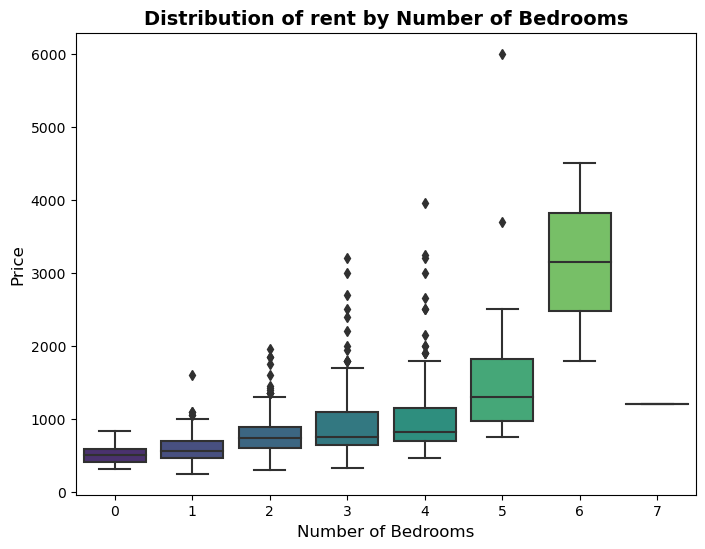

In [8]:
# Set figure size
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x='bed', y='price', data=df, palette='viridis')

# Add title
plt.title('Distribution of rent by Number of Bedrooms', fontsize=14, weight='bold')

# Add labels
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

### Average rent by State and Property type

**1. What does this visualisation reveal?** Median rent disparities across states and property types

**2. Why this type of visualisation was selected?**
A heatmap is ideal because it effectively shows the relationship between two categorical variables **(state and property type)** and their impact on rental prices. Color intensity makes it easy to spot high or low-rent areas at a glance.

**3. How insights from the graph are useful for real estate stakeholders?**
- **Landlords** can adjust pricing in high-demand areas to stay competitive or increase profits.
- **Real estate agencies** can use insights from this heatmap to compare rental prices across regions and provide recommendations for each states separately.
- **Tenants** can easily identify which states and property types fit their budget and make relocation decision if necessary.

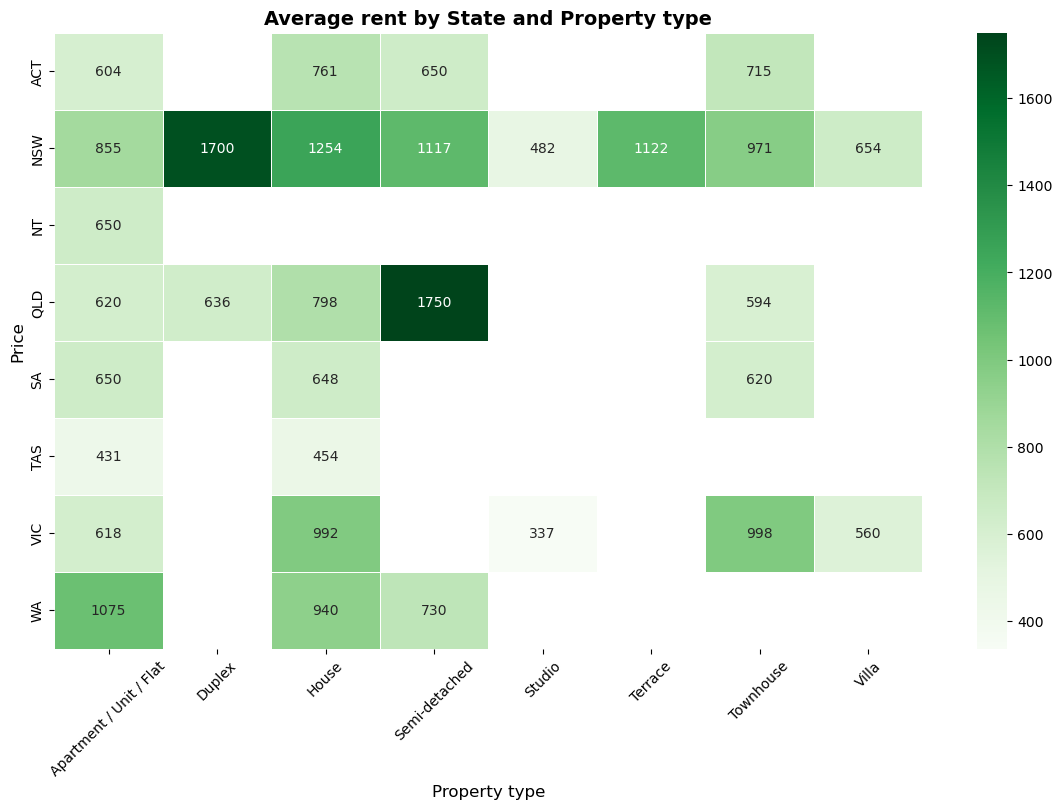

In [9]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Pivot data 
pivot_data = df.pivot_table(index='state', columns='property_type', values='price', aggfunc='mean')

# Heatmap
sns.heatmap(pivot_data, annot=True, cmap='Greens', fmt='.0f', linewidths=0.5)

# Add title
plt.title('Average rent by State and Property type', fontsize=14, weight='bold')

# Add labels
plt.xlabel('Property type', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Rotate xticks
plt.xticks(rotation=45)
plt.show()